In [70]:
import importlib

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
import torch
import utils2
import model2
importlib.reload(utils2)
importlib.reload(model2)
from utils2 import *
from model2 import *
import copy

In [71]:
dataset_path = "Sketch-Icon-Dataset/"
icon_path = os.path.join(dataset_path, 'icon/')
sketch_path = os.path.join(dataset_path, 'sketch/')

icon_sketch_dic = get_dict_icon_sketches()
icon_sketch_dic_TRAIN = copy.deepcopy(icon_sketch_dic)
icon_sketch_dic_TEST = {}

NUM_TEST_SKETCHES = 1


for icon in icon_sketch_dic.keys():
    sketch_list = []
    for i in range(0, NUM_TEST_SKETCHES):
        sketch = np.random.choice(icon_sketch_dic[icon][1])
        sketch_list.append(sketch)
        icon_sketch_dic_TRAIN[icon][1].remove(sketch)
    icon_sketch_dic_TEST[icon] = (icon_sketch_dic[icon][0], sketch_list)


In [72]:
icon_name = np.random.choice(list(icon_sketch_dic_TEST.keys()))
test_sketch_name, category = np.random.choice(icon_sketch_dic_TEST[icon_name][1]), icon_sketch_dic_TEST[icon_name][0]
test_sketch_path = sketch_path + category + '/' + test_sketch_name
print(test_sketch_path)

Sketch-Icon-Dataset/sketch/beverage/coffee_7.png


In [73]:
test_sketch = load_img(test_sketch_path)
test_sketch = np.expand_dims(test_sketch, 0)
test_sketch.shape

(1, 100, 100, 3)

In [74]:
test_icons = []
test_icon_paths = []
for icon, (category,_) in icon_sketch_dic_TEST.items():
    path = icon_path + category + '/' + icon
    test_icons.append(load_img(path))
    test_icon_paths.append(path)
test_icons = np.array(test_icons)
test_icons.shape

(100, 100, 100, 3)

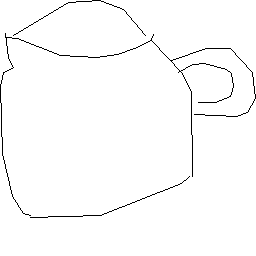

In [75]:
from PIL import Image
Image.open(test_sketch_path)

In [76]:
num_epochs = 10000
BATCH_SIZE = 6
margin = 1
optimizer = tf.keras.optimizers.Adam(0.0001)
tf.keras.backend.set_floatx('float64')
siameseModel = mynet()
loss = siamese_loss

def train_step( icons, sketches , labels, margin):
    with tf.GradientTape() as tape:
        model1 = siameseModel(icons)
        model2 = siameseModel(sketches)    
        tape.watch(model1)
        tape.watch(model2)
        labels = tf.convert_to_tensor(labels, dtype=tf.float64)
        tape.watch(labels)
        #current_loss = loss(model1, model2, labels, margin)
        current_loss = loss(model1, model2, labels)
    grads = tape.gradient(current_loss, siameseModel.trainable_variables)
    optimizer.apply_gradients(zip(grads, siameseModel.trainable_variables))
    return current_loss

Epoch 0: Loss: 5.238
(1, 64)
(100, 64)


Epoch 1: Loss: 5.374
Epoch 2: Loss: 4.795
Epoch 3: Loss: 4.825
Epoch 4: Loss: 5.128
Epoch 5: Loss: 4.897
(1, 64)
(100, 64)


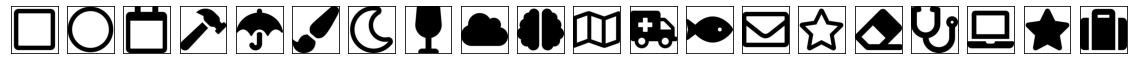

Epoch 6: Loss: 5.096
Epoch 7: Loss: 4.981
Epoch 8: Loss: 5.065
Epoch 9: Loss: 5.111
Epoch 10: Loss: 5.135
(1, 64)
(100, 64)


Epoch 11: Loss: 4.878
Epoch 12: Loss: 4.831
Epoch 13: Loss: 5.337
Epoch 14: Loss: 5.347
Epoch 15: Loss: 4.578
(1, 64)
(100, 64)


Epoch 16: Loss: 4.955
Epoch 17: Loss: 5.286
Epoch 18: Loss: 5.029
Epoch 19: Loss: 4.966
Epoch 20: Loss: 5.013
(1, 64)
(100, 64)


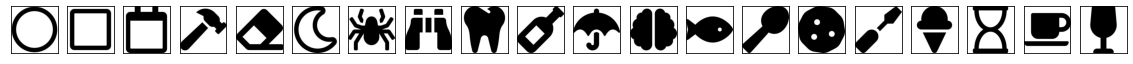

Epoch 21: Loss: 4.991
Epoch 22: Loss: 4.919
Epoch 23: Loss: 4.956
Epoch 24: Loss: 5.068
Epoch 25: Loss: 5.366
(1, 64)
(100, 64)


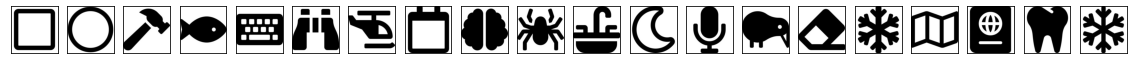

Epoch 26: Loss: 5.008
Epoch 27: Loss: 4.722
Epoch 28: Loss: 4.914
Epoch 29: Loss: 4.915
Epoch 30: Loss: 4.876
(1, 64)
(100, 64)


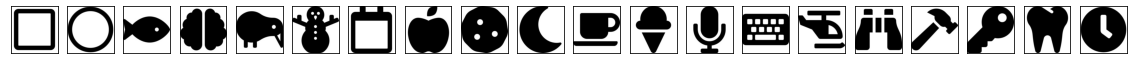

Epoch 31: Loss: 4.838
Epoch 32: Loss: 4.791
Epoch 33: Loss: 4.616
Epoch 34: Loss: 4.994
Epoch 35: Loss: 4.827
(1, 64)
(100, 64)


Epoch 36: Loss: 4.901
Epoch 37: Loss: 4.758
Epoch 38: Loss: 5.333
Epoch 39: Loss: 4.918
Epoch 40: Loss: 4.905
(1, 64)
(100, 64)


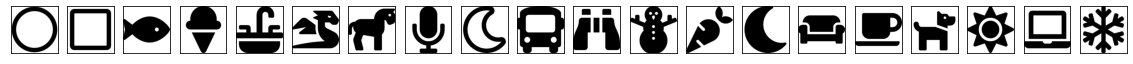

Epoch 41: Loss: 4.879
Epoch 42: Loss: 4.774
Epoch 43: Loss: 5.079
Epoch 44: Loss: 4.904
Epoch 45: Loss: 4.754
(1, 64)
(100, 64)


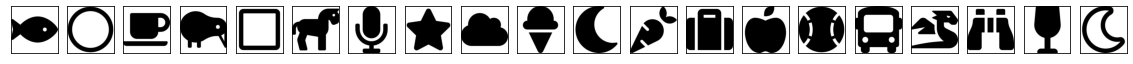

Epoch 46: Loss: 4.715
Epoch 47: Loss: 4.904
Epoch 48: Loss: 5.391
Epoch 49: Loss: 5.423
Epoch 50: Loss: 4.907
(1, 64)
(100, 64)


Epoch 51: Loss: 4.657
Epoch 52: Loss: 4.781
Epoch 53: Loss: 4.824
Epoch 54: Loss: 4.858
Epoch 55: Loss: 5.003
(1, 64)
(100, 64)


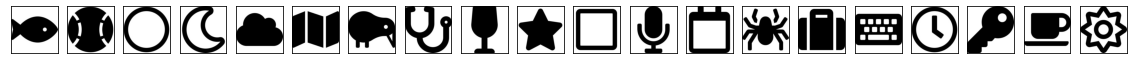

Epoch 56: Loss: 4.858
Epoch 57: Loss: 5.083
Epoch 58: Loss: 4.939
Epoch 59: Loss: 4.882
Epoch 60: Loss: 4.876
(1, 64)
(100, 64)


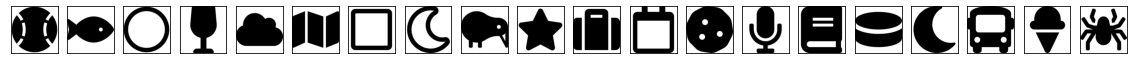

Epoch 61: Loss: 4.909
Epoch 62: Loss: 4.614
Epoch 63: Loss: 4.985
Epoch 64: Loss: 5.212
Epoch 65: Loss: 5.209
(1, 64)
(100, 64)


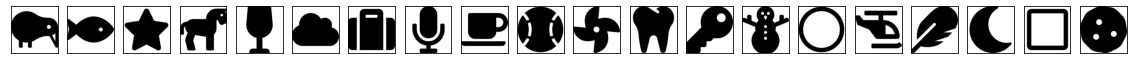

Epoch 66: Loss: 4.901
Epoch 67: Loss: 5.014
Epoch 68: Loss: 4.994
Epoch 69: Loss: 4.972
Epoch 70: Loss: 4.992
(1, 64)
(100, 64)


Epoch 71: Loss: 5.015
Epoch 72: Loss: 4.984
Epoch 73: Loss: 4.967
Epoch 74: Loss: 4.861
Epoch 75: Loss: 4.690
(1, 64)
(100, 64)


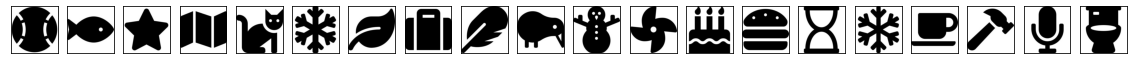

Epoch 76: Loss: 4.754
Epoch 77: Loss: 4.630
Epoch 78: Loss: 5.144
Epoch 79: Loss: 5.110
Epoch 80: Loss: 5.187
(1, 64)
(100, 64)


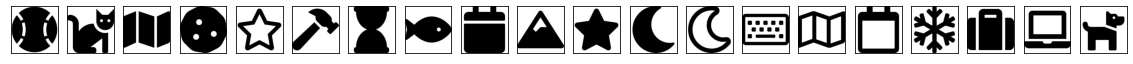

Epoch 81: Loss: 5.108
Epoch 82: Loss: 5.023
Epoch 83: Loss: 5.056
Epoch 84: Loss: 5.227
Epoch 85: Loss: 5.093
(1, 64)
(100, 64)


Epoch 86: Loss: 4.881
Epoch 87: Loss: 4.867
Epoch 88: Loss: 4.989
Epoch 89: Loss: 5.625
Epoch 90: Loss: 4.800
(1, 64)
(100, 64)


Epoch 91: Loss: 5.236
Epoch 92: Loss: 4.776
Epoch 93: Loss: 5.160
Epoch 94: Loss: 4.923
Epoch 95: Loss: 5.034
(1, 64)
(100, 64)


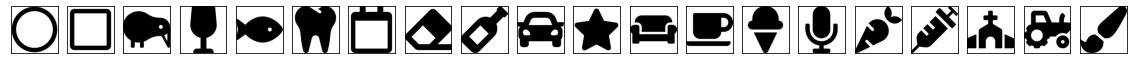

Epoch 96: Loss: 5.070
Epoch 97: Loss: 5.009
Epoch 98: Loss: 4.873
Epoch 99: Loss: 5.091
Epoch 100: Loss: 4.813
(1, 64)
(100, 64)


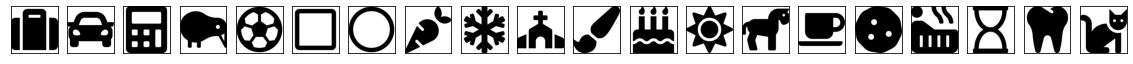

Epoch 101: Loss: 4.697
Epoch 102: Loss: 4.433
Epoch 103: Loss: 5.219
Epoch 104: Loss: 5.026
Epoch 105: Loss: 5.378
(1, 64)
(100, 64)


Epoch 106: Loss: 4.883
Epoch 107: Loss: 5.086
Epoch 108: Loss: 4.881
Epoch 109: Loss: 4.834
Epoch 110: Loss: 4.963
(1, 64)
(100, 64)


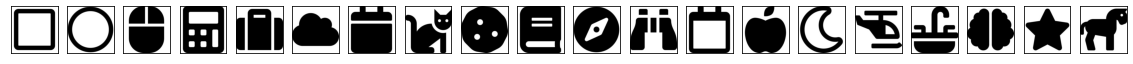

Epoch 111: Loss: 4.906
Epoch 112: Loss: 4.960
Epoch 113: Loss: 5.084
Epoch 114: Loss: 4.844
Epoch 115: Loss: 5.097
(1, 64)
(100, 64)


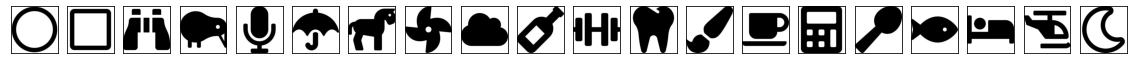

Epoch 116: Loss: 4.876
Epoch 117: Loss: 4.667
Epoch 118: Loss: 4.900
Epoch 119: Loss: 4.756
Epoch 120: Loss: 4.920
(1, 64)
(100, 64)


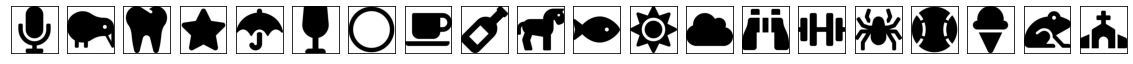

Epoch 121: Loss: 5.435
Epoch 122: Loss: 4.456
Epoch 123: Loss: 4.926
Epoch 124: Loss: 4.697
Epoch 125: Loss: 4.862
(1, 64)
(100, 64)


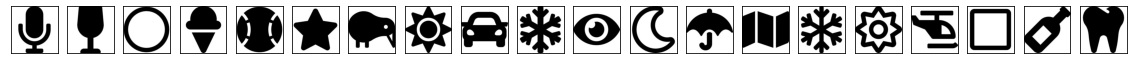

Epoch 126: Loss: 4.911
Epoch 127: Loss: 5.219
Epoch 128: Loss: 4.900
Epoch 129: Loss: 4.819
Epoch 130: Loss: 4.827
(1, 64)
(100, 64)


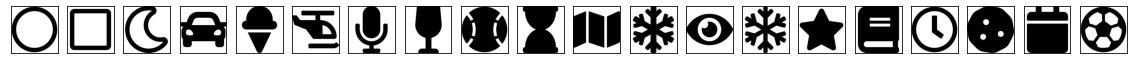

Epoch 131: Loss: 4.964
Epoch 132: Loss: 4.902
Epoch 133: Loss: 4.937
Epoch 134: Loss: 4.751
Epoch 135: Loss: 4.776
(1, 64)
(100, 64)


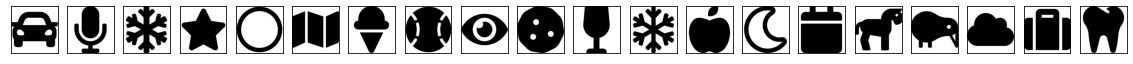

Epoch 136: Loss: 5.004
Epoch 137: Loss: 5.068
Epoch 138: Loss: 4.598
Epoch 139: Loss: 5.145
Epoch 140: Loss: 4.962
(1, 64)
(100, 64)


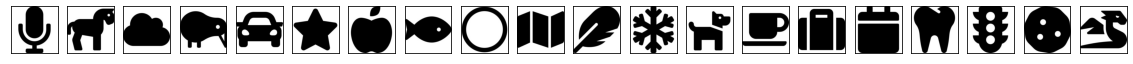

Epoch 141: Loss: 4.661
Epoch 142: Loss: 4.899
Epoch 143: Loss: 5.036
Epoch 144: Loss: 4.895
Epoch 145: Loss: 4.534
(1, 64)
(100, 64)


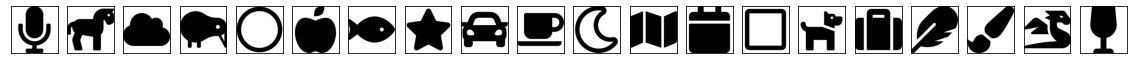

Epoch 146: Loss: 4.644
Epoch 147: Loss: 4.900
Epoch 148: Loss: 4.748
Epoch 149: Loss: 5.233
Epoch 150: Loss: 5.099
(1, 64)
(100, 64)


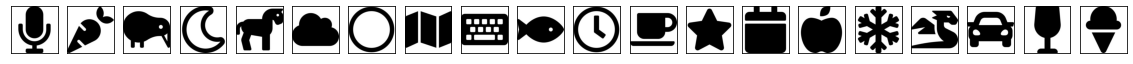

Epoch 151: Loss: 4.858
Epoch 152: Loss: 4.496
Epoch 153: Loss: 4.543
Epoch 154: Loss: 4.909
Epoch 155: Loss: 4.914
(1, 64)
(100, 64)


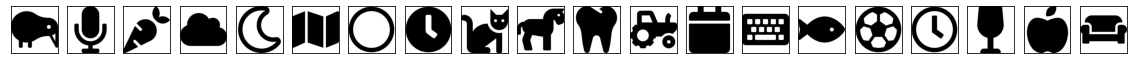

Epoch 156: Loss: 4.914
Epoch 157: Loss: 5.246
Epoch 158: Loss: 4.946
Epoch 159: Loss: 4.504
Epoch 160: Loss: 4.968
(1, 64)
(100, 64)


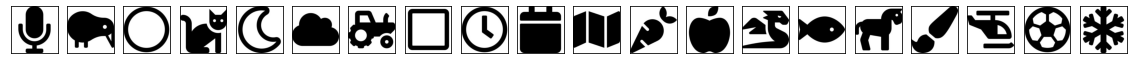

Epoch 161: Loss: 4.934
Epoch 162: Loss: 4.932
Epoch 163: Loss: 4.968
Epoch 164: Loss: 4.963
Epoch 165: Loss: 4.781
(1, 64)
(100, 64)


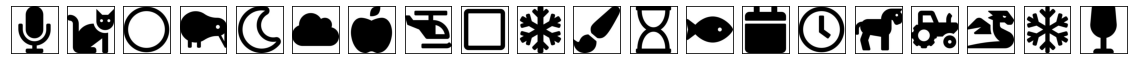

Epoch 166: Loss: 5.022
Epoch 167: Loss: 4.900
Epoch 168: Loss: 4.861
Epoch 169: Loss: 4.997
Epoch 170: Loss: 4.720
(1, 64)
(100, 64)


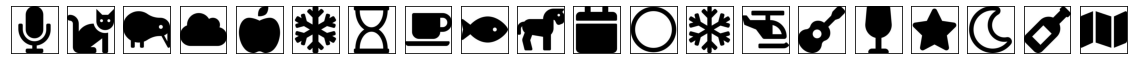

Epoch 171: Loss: 5.167
Epoch 172: Loss: 4.660
Epoch 173: Loss: 4.812
Epoch 174: Loss: 4.472
Epoch 175: Loss: 4.747
(1, 64)
(100, 64)


Epoch 176: Loss: 4.558
Epoch 177: Loss: 5.255
Epoch 178: Loss: 5.137
Epoch 179: Loss: 4.835
Epoch 180: Loss: 4.821
(1, 64)
(100, 64)


Epoch 181: Loss: 4.811
Epoch 182: Loss: 4.860
Epoch 183: Loss: 4.906
Epoch 184: Loss: 4.726
Epoch 185: Loss: 4.416
(1, 64)
(100, 64)


Epoch 186: Loss: 4.983
Epoch 187: Loss: 4.711
Epoch 188: Loss: 5.318
Epoch 189: Loss: 4.605
Epoch 190: Loss: 5.206
(1, 64)
(100, 64)


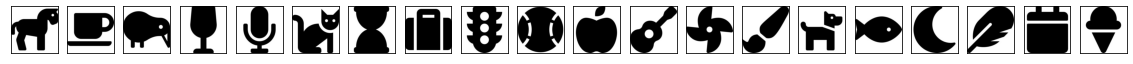

Epoch 191: Loss: 4.664
Epoch 192: Loss: 4.808
Epoch 193: Loss: 4.989
Epoch 194: Loss: 4.809
Epoch 195: Loss: 4.600
(1, 64)
(100, 64)


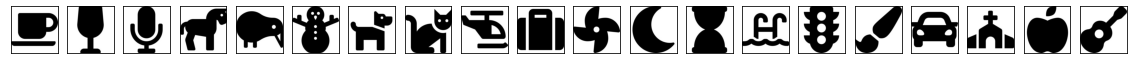

Epoch 196: Loss: 4.809
Epoch 197: Loss: 5.099
Epoch 198: Loss: 4.754
Epoch 199: Loss: 4.853
Epoch 200: Loss: 4.703
(1, 64)
(100, 64)


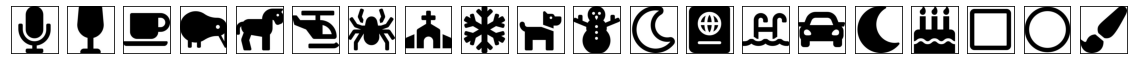

Epoch 201: Loss: 4.904
Epoch 202: Loss: 4.695
Epoch 203: Loss: 5.072
Epoch 204: Loss: 4.590
Epoch 205: Loss: 5.066
(1, 64)
(100, 64)


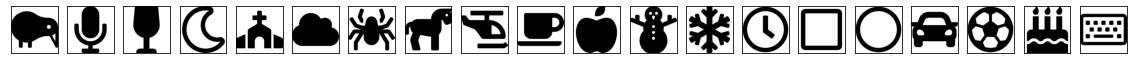

Epoch 206: Loss: 4.958
Epoch 207: Loss: 4.802
Epoch 208: Loss: 4.850
Epoch 209: Loss: 5.018
Epoch 210: Loss: 4.675
(1, 64)
(100, 64)


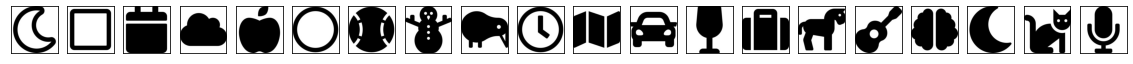

Epoch 211: Loss: 5.078
Epoch 212: Loss: 5.000
Epoch 213: Loss: 4.812
Epoch 214: Loss: 4.989
Epoch 215: Loss: 4.778
(1, 64)
(100, 64)


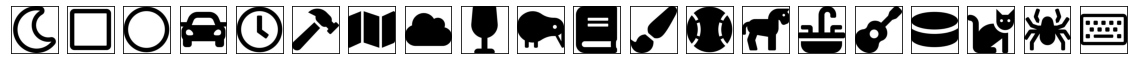

Epoch 216: Loss: 4.843
Epoch 217: Loss: 4.894
Epoch 218: Loss: 4.813
Epoch 219: Loss: 4.899
Epoch 220: Loss: 4.801
(1, 64)
(100, 64)


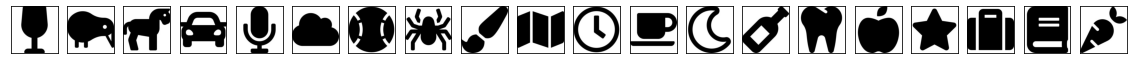

Epoch 221: Loss: 4.802
Epoch 222: Loss: 4.807
Epoch 223: Loss: 5.057
Epoch 224: Loss: 5.110
Epoch 225: Loss: 4.689
(1, 64)
(100, 64)


Epoch 226: Loss: 4.853
Epoch 227: Loss: 4.946
Epoch 228: Loss: 4.894
Epoch 229: Loss: 4.893
Epoch 230: Loss: 4.900
(1, 64)
(100, 64)


Epoch 231: Loss: 4.902
Epoch 232: Loss: 4.871


KeyboardInterrupt: 

In [77]:
#weights = []
for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    i, s, labels = get_batch(icon_sketch_dic_TRAIN, BATCH_SIZE)
    loss_value = train_step(i, s, labels, margin)
    epoch_loss_avg.update_state(loss_value)

    print("Epoch {:d}: Loss: {:.3f}".format(epoch,epoch_loss_avg.result()))
    #weights.append(siameseModel.trainable_variables)
